# Boston House Price Prediction with Linear Regression

**Context**
<br />
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
<br />

**Attribute Information**
<br />
1) CRIM: per capita crime rate by town
<br />
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
<br />
3) INDUS: proportion of non-retail business acres per town
<br />
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
<br />
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
<br />
6) RM: average number of rooms per dwelling
<br />
7) AGE: proportion of owner-occupied units built prior to 1940
<br />
8) DIS: weighted distances to five Boston employment centres
<br />
9) RAD: index of accessibility to radial highways
<br />
10) TAX: full-value property-tax rate per $10,000 
<br />
11) PTRATIO: pupil-teacher ratio by town
<br />
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
<br />
13) LSTAT: % lower status of the population
<br />

**Output variable:**
<br />
1) MEDV: Median value of owner-occupied homes in $1000's

**Source**
<br />
StatLib - Carnegie Mellon University
<br />

# Import Libraries

In [30]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
import os
from sklearn.linear_model import LinearRegression

# SET Mlflow tracking server and create an experiment

In [10]:

mlflow.set_tracking_uri(os.environ.get("MLFLOW_TRACKING_URI"))
EXPERIMENT_NAME = "demo"
EXPERIMENT_ID = mlflow.set_experiment(EXPERIMENT_NAME)

2023/05/27 13:37:53 INFO mlflow.tracking.fluent: Experiment with name 'demo' does not exist. Creating a new experiment.


# Read Data

In [12]:
boston_data = pd.read_csv('boston.csv')
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# #Rapid EDA

# import sweetviz as sv

# report = sv.analyze(boston_data)
# report.show_notebook()

# Train Test Split

In [16]:
y = boston_data.MEDV
X = boston_data.drop(['MEDV'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Define the Model

In [28]:
model = LinearRegression(fit_intercept=False)

# Fit the Model

/home/thimotee/miniconda3/envs/ecom-app/lib/python3.9/site-packages/mlflow/models/signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
Successfully registered model 'linearRegressionModel'.
2023/05/27 14:28:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name

Mean Absolute Error
MAE:  3.7048362423420476

Mean Squared Error
MSE:  36.11531753130366

Root Mean Squared Error
RMSE:  6.0096021108974975

Root Mean Squared Log Error 
RMSLE:  1.7933585418459332
Name: linearRegressionModel
Version: 1


Created version '1' of model 'linearRegressionModel'.


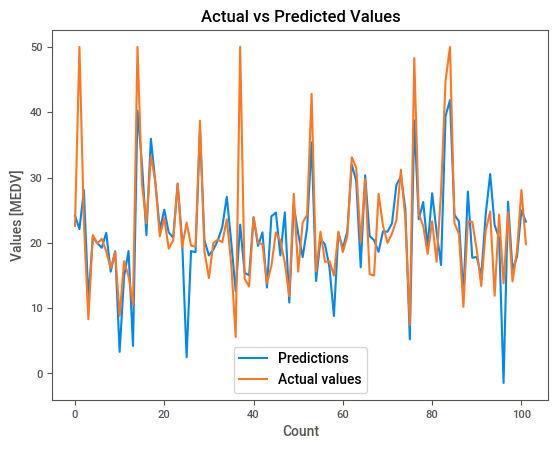

In [38]:
with mlflow.start_run() as run:
    model.fit(X_train, y_train)
    
    mlflow.log_param("Intercept", model.intercept_)
    mlflow.log_param("Coefficient", model.coef_)
    
    predictions = model.predict(X_test)
    signature = infer_signature(X_test, predictions)

    # mlflow.log_param("Prediction Test set", predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mlflow.log_metric("mae", mae)
    
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mlflow.log_metric("rmse", rmse)
    
    rmsle = np.log(np.sqrt(mean_squared_error(y_test, predictions)))
    mlflow.log_metric("rmsle", rmsle)
    
    mlflow.sklearn.log_model(model, artifact_path="sklearn-model", signature=signature)

    fig, ax = plt.subplots()
    ax.plot(predictions, label='Predictions') 
    ax.plot(y_test.to_numpy(), label='Actual values')
    ax.set_xlabel('Count')
    ax.set_ylabel('Values [MEDV]')
    ax.legend()
    ax.set_title('Actual vs Predicted Values')
    #plt.show()
    mlflow.log_figure(fig, "figure.png")

    print('Mean Absolute Error')
    print('MAE: ', mae)

    print('\nMean Squared Error')
    print('MSE: ', mse)

    print('\nRoot Mean Squared Error')
    print("RMSE: ", rmse)

    print('\nRoot Mean Squared Log Error ')
    print("RMSLE: ", rmsle)

model_uri = "runs:/{}/sklearn-model".format(run.info.run_id)
mv = mlflow.register_model(model_uri, "linearRegressionModel")
print("Name: {}".format(mv.name))
print("Version: {}".format(mv.version))

In [21]:
print('Intercept\n', model.intercept_)
print('\nCoefficient\n', model.coef_)

Intercept
 38.091694926302296

Coefficient
 [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


# Prediction

In [22]:
predictions = model.predict(X_test)

# Evaluation

In [11]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, predictions)))

print('Mean Absolute Error')
print('MAE: ', mae)

print('\nMean Squared Error')
print('MSE: ', mse)

print('\nRoot Mean Squared Error')
print("RMSE: ", rmse)

print('\nRoot Mean Squared Log Error ')
print("RMSLE: ", rmsle)

Mean Absolute Error
MAE:  3.8429092204444983

Mean Squared Error
MSE:  33.44897999767639

Root Mean Squared Error
RMSE:  5.783509315085123

Root Mean Squared Log Error 
RMSLE:  1.7550106463831492


# Plot Actual vs Predicted Values

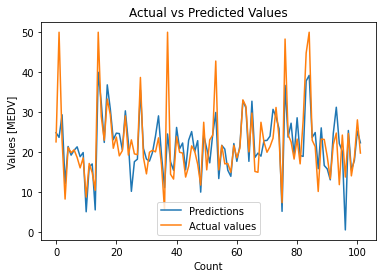

In [12]:
plt.plot(predictions, label='Predictions') 
plt.plot(y_test.to_numpy(), label='Actual values')
plt.xlabel('Count')
plt.ylabel('Values [MEDV]')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()